In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [4]:
#function to create a server connection
def server_conn(host_name,user_name,user_password):
    connection = None
    try:
        connection = mysql.connector.connect(host = host_name,
                                             user = user_name,
                                             passwd = user_password)
        print('Server connection Established')
    except Error as err:
        print('Error-' , err)
    return connection

connection = server_conn("localhost","root","725@Mysql")
print(connection)

Server connection Established


In [5]:
#function to create a database
def create_db(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database Connection Created Successfully")
    except Error as err:
        print('Error-' , err)
        
database_create_query = "create database mydb"
create_db(connection,database_create_query)

Database Connection Created Successfully


In [7]:
#function to connect with database
def db_conn(host_name,user_name,user_password,dbname):
    connection = None
    try:
        connection = mysql.connector.connect(host = host_name,
                                             user = user_name,
                                             passwd = user_password,
                                             database=dbname)
        print('Database connection Established')
    except Error as err:
        print('Error-' , err)
    return connection

connection = db_conn("localhost","root","725@Mysql","mydb")
print(connection)

Database connection Established


In [9]:
#function to execute sql querries
def execute_query(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print('Query Executed')
    except Error as err:
        print("Error:-",err)

In [18]:
#create a table to maintain product order history
create_ord_table = """
create table order_details(
order_id INT AUTO_INCREMENT primary key,
consumer_name varchar(35),
prod_name varchar(25),
quantity int,
order_date date,
price float,
contact varchar(25));
"""

#database connection
connection = db_conn("localhost","root","725@Mysql","mydb")
#execute query
execute_query(connection,create_ord_table)

Database connection Established
Query Executed


In [21]:
#Insert the data into the table
order_info = """
insert into order_details (consumer_name,prod_name,quantity,order_date,price,contact)
values ('John','Trimmer',3,'2022-05-12',450,'9876435678'),
('Vinay','Tablet',2,'2022-05-06',4500,'9876435788'),
('Bipul','Monitor',5,'2022-05-09',1500,'98764234675'),
('Raj','Bottle',7,'2022-05-15',50,'98764369964'),
('Jerry','Laptop',1,'2022-05-11',45000,'9876456885'),
('Atul','Keyboard',10,'2022-05-22',350,'9876467933')
"""

connection = db_conn("localhost","root","725@Mysql","mydb")
execute_query(connection,order_info)

Database connection Established
Query Executed


In [24]:
#Function Read the data table

def read_table(connection,query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print("Error-" , err)

In [26]:
#Execute Read function
read_query = "select * from order_details"
connection = db_conn("localhost","root","725@Mysql","mydb")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database connection Established
(1, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 450.0, '9876435678')
(2, 'Vinay', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '9876435788')
(3, 'Bipul', 'Monitor', 5, datetime.date(2022, 5, 9), 1500.0, '98764234675')
(4, 'Raj', 'Bottle', 7, datetime.date(2022, 5, 15), 50.0, '98764369964')
(5, 'Jerry', 'Laptop', 1, datetime.date(2022, 5, 11), 45000.0, '9876456885')
(6, 'Atul', 'Keyboard', 10, datetime.date(2022, 5, 22), 350.0, '9876467933')


In [27]:
read_query = "select consumer_name,prod_name,contact from order_details"
connection = db_conn("localhost","root","725@Mysql","mydb")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database connection Established
('John', 'Trimmer', '9876435678')
('Vinay', 'Tablet', '9876435788')
('Bipul', 'Monitor', '98764234675')
('Raj', 'Bottle', '98764369964')
('Jerry', 'Laptop', '9876456885')
('Atul', 'Keyboard', '9876467933')


In [32]:
read_query = """select consumer_name,
year(order_date),month(order_date),day(order_date) 
from order_details"""
connection = db_conn("localhost","root","725@Mysql","mydb")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database connection Established
('John', 2022, 5, 12)
('Vinay', 2022, 5, 6)
('Bipul', 2022, 5, 9)
('Raj', 2022, 5, 15)
('Jerry', 2022, 5, 11)
('Atul', 2022, 5, 22)


In [33]:
#run a query to find order before 11-05-22

read_query = "select * from order_details where order_date < '2022-05-11'"
connection = db_conn("localhost","root","725@Mysql","mydb")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database connection Established
(2, 'Vinay', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '9876435788')
(3, 'Bipul', 'Monitor', 5, datetime.date(2022, 5, 9), 1500.0, '98764234675')


In [35]:
#Execute query to access order by price in ascending order

read_query = "select * from order_details order by price"
connection = db_conn("localhost","root","725@Mysql","mydb")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database connection Established
(4, 'Raj', 'Bottle', 7, datetime.date(2022, 5, 15), 50.0, '98764369964')
(6, 'Atul', 'Keyboard', 10, datetime.date(2022, 5, 22), 350.0, '9876467933')
(1, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 450.0, '9876435678')
(3, 'Bipul', 'Monitor', 5, datetime.date(2022, 5, 9), 1500.0, '98764234675')
(2, 'Vinay', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '9876435788')
(5, 'Jerry', 'Laptop', 1, datetime.date(2022, 5, 11), 45000.0, '9876456885')


In [40]:
db_info = []

for res in results:
    db_info.append(list(res))

col_names = ['Order_Id','Name','Product','Quantity','OrderedDate','UnitPrice','Contact']

df = pd.DataFrame(db_info,columns=col_names)
df

,Order_Id,Name,Product,Quantity,OrderedDate,UnitPrice,Contact
0,4,Raj,Bottle,7,2022-05-15,50.0,98764369964
1,6,Atul,Keyboard,10,2022-05-22,350.0,9876467933
2,1,John,Trimmer,3,2022-05-12,450.0,9876435678
3,3,Bipul,Monitor,5,2022-05-09,1500.0,98764234675
4,2,Vinay,Tablet,2,2022-05-06,4500.0,9876435788
5,5,Jerry,Laptop,1,2022-05-11,45000.0,9876456885


In [42]:
#Create a column with 'Total price Paid'
df['Total_Paid_amount'] = df.Quantity * df.UnitPrice

In [43]:
df.head()

,Order_Id,Name,Product,Quantity,OrderedDate,UnitPrice,Contact,Total_Paid_amount
0,4,Raj,Bottle,7,2022-05-15,50.0,98764369964,350.0
1,6,Atul,Keyboard,10,2022-05-22,350.0,9876467933,3500.0
2,1,John,Trimmer,3,2022-05-12,450.0,9876435678,1350.0
3,3,Bipul,Monitor,5,2022-05-09,1500.0,98764234675,7500.0
4,2,Vinay,Tablet,2,2022-05-06,4500.0,9876435788,9000.0


<AxesSubplot:xlabel='Product'>

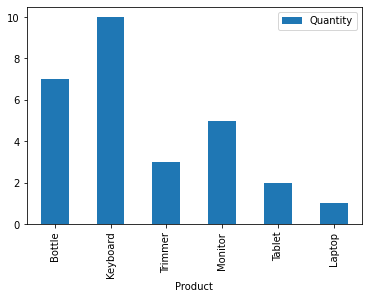

In [45]:
df[['Product','Quantity']].plot.bar(x='Product')

In [52]:
#Update Query => set price = 400 for order id 1
update_query = "update order_details set price = 400 where order_id = 1"
connection = db_conn("localhost","root","725@Mysql","mydb")
result = execute_query(connection,update_query)

Database connection Established
Query Executed


In [55]:
#read info for id 4
read_q4 = "select * from order_details where order_id = 4"
connection = db_conn("localhost","root","725@Mysql","mydb")
result = read_table(connection,read_q4)

for res in result:
    print(res)

Database connection Established
(4, 'Raj', 'Bottle', 7, datetime.date(2022, 5, 15), 50.0, '98764369964')


In [58]:
#delete query => delete order details for order id 3
delete_order = "DELETE FROM order_details where order_id=3"
connection = db_conn("localhost","root","725@Mysql","mydb")
execute_query(connection,delete_order)

Database connection Established
Query Executed


In [62]:
#read final result
read_order = "select * from order_details order by price"
connection = db_conn("localhost","root","725@Mysql","mydb")
result = read_table(connection,read_order)

for res in result:
    print(res)

Database connection Established
(4, 'Raj', 'Bottle', 7, datetime.date(2022, 5, 15), 50.0, '98764369964')
(6, 'Atul', 'Keyboard', 10, datetime.date(2022, 5, 22), 350.0, '9876467933')
(1, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 400.0, '9876435678')
(2, 'Vinay', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '9876435788')
(5, 'Jerry', 'Laptop', 1, datetime.date(2022, 5, 11), 45000.0, '9876456885')


In [63]:
db_info = []

for res in result:
    db_info.append(list(res))
    
col_names = ['Order_Id','Name','Product','Quantity','OrderedDate','UnitPrice','Contact']

df = pd.DataFrame(db_info,columns=col_names)
df

,Order_Id,Name,Product,Quantity,OrderedDate,UnitPrice,Contact
0,4,Raj,Bottle,7,2022-05-15,50.0,98764369964
1,6,Atul,Keyboard,10,2022-05-22,350.0,9876467933
2,1,John,Trimmer,3,2022-05-12,400.0,9876435678
3,2,Vinay,Tablet,2,2022-05-06,4500.0,9876435788
4,5,Jerry,Laptop,1,2022-05-11,45000.0,9876456885


<AxesSubplot:xlabel='Product'>

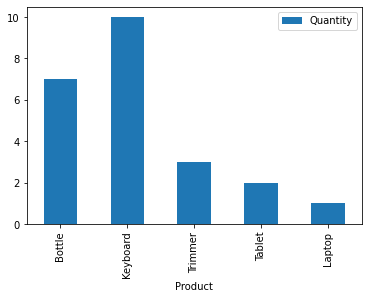

In [64]:
df[['Product','Quantity']].plot.bar(x='Product')